In [1]:
from google.colab import files
uploaded = files.upload()

Saving Historical Product Demand.csv to Historical Product Demand.csv


In [4]:
import pandas as pd
df = pd.read_csv('Historical Product Demand.csv')  # use your exact filename
df.head()

,Product_Code,Warehouse,Product_Category,Date,Order_Demand
0,Product_0993,Whse_J,Category_028,2012/7/27,100
1,Product_0979,Whse_J,Category_028,2012/1/19,500
2,Product_0979,Whse_J,Category_028,2012/2/3,500
3,Product_0979,Whse_J,Category_028,2012/2/9,500
4,Product_0979,Whse_J,Category_028,2012/3/2,500


In [5]:
df.info()
df.isnull().sum()
df.duplicated().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 5 columns):
 #   Column            Non-Null Count    Dtype 
---  ------            --------------    ----- 
 0   Product_Code      1048575 non-null  object
 1   Warehouse         1048575 non-null  object
 2   Product_Category  1048575 non-null  object
 3   Date              1037336 non-null  object
 4   Order_Demand      1048575 non-null  object
dtypes: object(5)
memory usage: 40.0+ MB


np.int64(122423)

In [6]:
df.dropna(inplace=True)
df.drop_duplicates(inplace=True)

In [7]:
df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values('Date')
df.head()

,Product_Code,Warehouse,Product_Category,Date,Order_Demand
44799,Product_0965,Whse_A,Category_006,2011-01-08,2
72252,Product_1724,Whse_A,Category_003,2011-05-31,108
8431,Product_1521,Whse_S,Category_019,2011-06-24,85000
8432,Product_1521,Whse_S,Category_019,2011-06-24,7000
72669,Product_1507,Whse_C,Category_019,2011-09-02,1250


<ipython-input-8-b344a5eab88f>:9: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_demand = daily_demand.resample('M').sum()


<Axes: title={'center': 'Monthly Product Demand'}, xlabel='Date'>

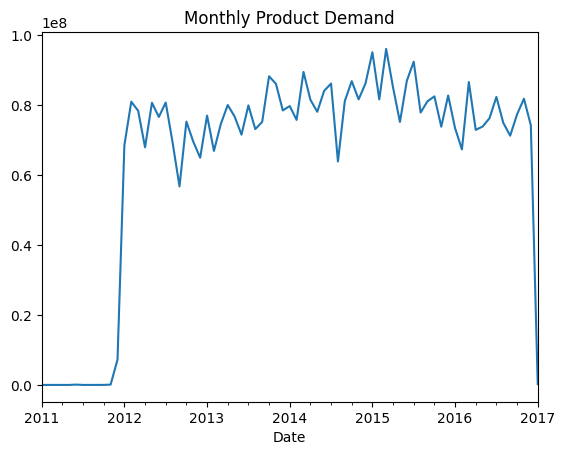

In [8]:
# Clean 'Order_Demand' column if it's in parentheses (negative values)
df['Order_Demand'] = df['Order_Demand'].astype(str).str.replace('(', '-').str.replace(')', '')
df['Order_Demand'] = pd.to_numeric(df['Order_Demand'])

# Group by date
daily_demand = df.groupby('Date')['Order_Demand'].sum()

# Resample to monthly
monthly_demand = daily_demand.resample('M').sum()

monthly_demand.plot(title='Monthly Product Demand')

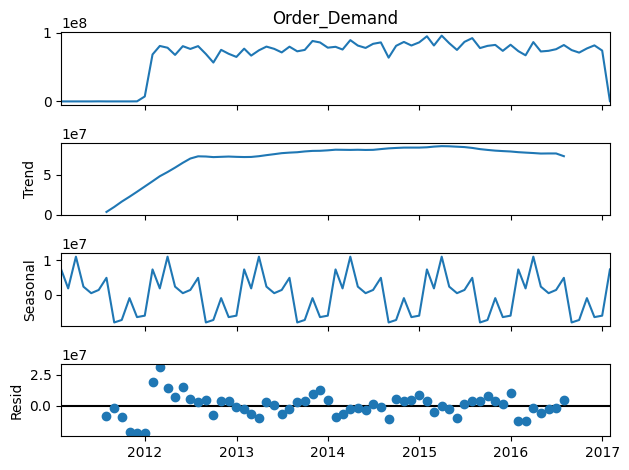

In [9]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

result = seasonal_decompose(monthly_demand, model='additive')
result.plot()
plt.tight_layout()
plt.show()

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
<ipython-input-16-1490c82ed57a>:24: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  future_dates = pd.date_range(start=monthly_demand.index[-1] + pd.offsets.MonthBegin(1), periods=n_periods, freq='M')


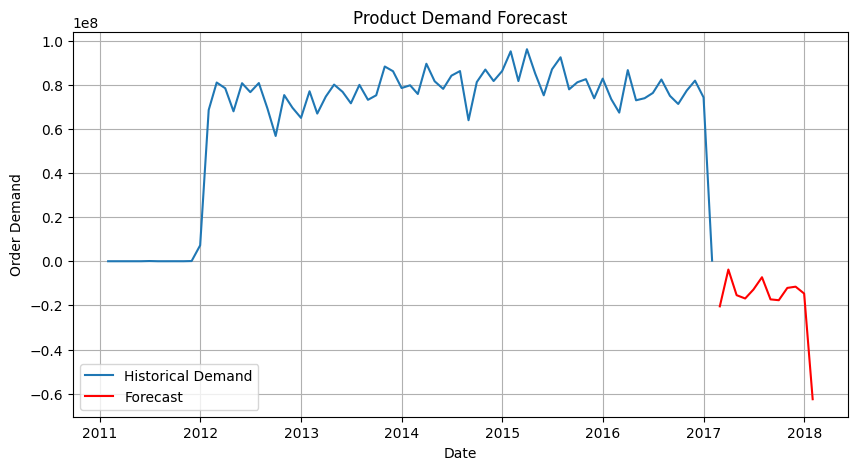

In [16]:
# %%
n_periods = 12  # Forecast 12 months

# --- Suggested Changes Start ---

# Import necessary library for SARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Define the SARIMA model. These parameters (p, d, q) and seasonal parameters (P, D, Q, S)
# often require tuning. For this example, we'll use a common starting point.
# (0, 1, 1) for non-seasonal part, (1, 1, 1, 12) for seasonal part (assuming yearly seasonality)
model = SARIMAX(monthly_demand, order=(0, 1, 1), seasonal_order=(1, 1, 1, 12))

# Fit the model to the historical data
model_fit = model.fit(disp=False) # disp=False suppresses optimization output

# Use the fitted model to make predictions
forecast = model_fit.predict(start=len(monthly_demand), end=len(monthly_demand) + n_periods - 1)

# --- Suggested Changes End ---


# Create future dates
future_dates = pd.date_range(start=monthly_demand.index[-1] + pd.offsets.MonthBegin(1), periods=n_periods, freq='M')

# Create forecast DataFrame
# The index of the forecast Series returned by predict needs to be set to the future dates
forecast.index = future_dates
forecast_df = pd.DataFrame({'Forecast': forecast}, index=future_dates)


# Plot
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
plt.plot(monthly_demand, label='Historical Demand')
plt.plot(forecast_df, label='Forecast', color='red')
plt.title('Product Demand Forecast')
plt.xlabel('Date')
plt.ylabel('Order Demand')
plt.legend()
plt.grid(True)
plt.show()
